<a href="https://colab.research.google.com/github/aniketmondal1210/CodePlayground/blob/main/EMML_SVM_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem. We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


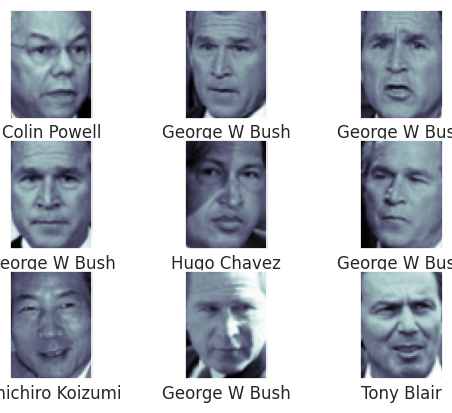

In [ ]:
# lets plot few of them
fig, ax = plt.subplots(3,3)
for i,axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[],
          xlabel=faces.target_names[faces.target[i]])

Each image contains [62x47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features, here we will use a principal component analysis to extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# Splitting the Training-Testing Data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
yfit = model.predict(X_test)

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C(which controls the margin hardness) and gamma(which controls the size of the radial basis function kernal) and determine the best model:

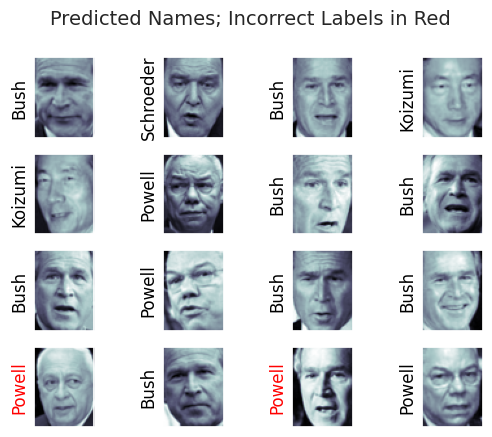

In [ ]:
# Some test pattern with their prediction:
fig, ax = plt.subplots(4,4)
for i, axi in enumerate(ax.flat):
  axi.imshow(X_test[i].reshape(62,47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                 color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
# Lets look onn classification report:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.58      0.74        12
     Colin Powell       0.65      0.96      0.78        51
  Donald Rumsfeld       0.91      0.84      0.88        25
    George W Bush       0.91      0.90      0.90        98
Gerhard Schroeder       1.00      0.67      0.80        21
      Hugo Chavez       1.00      0.60      0.75        15
Junichiro Koizumi       1.00      0.90      0.95        10
       Tony Blair       0.89      0.84      0.86        38

         accuracy                           0.85       270
        macro avg       0.92      0.79      0.83       270
     weighted avg       0.88      0.85      0.85       270



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yfit))

[[ 7  3  1  1  0  0  0  0]
 [ 0 49  1  1  0  0  0  0]
 [ 0  3 21  1  0  0  0  0]
 [ 0 10  0 88  0  0  0  0]
 [ 0  1  0  3 14  0  0  3]
 [ 0  2  0  3  0  9  0  1]
 [ 0  1  0  0  0  0  9  0]
 [ 0  6  0  0  0  0  0 32]]
